#  Titanic Disaster Survival Using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_train = pd.read_csv("../input/titanic/train.csv")
titanic_test = pd.read_csv("../input/titanic/test.csv")

### Load the Data

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Data Analysis

## Import Seaborn for visually analysing the data
## Find out how many survived vs died using countplot method seaborn

In [6]:
#countplot of survived vs not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

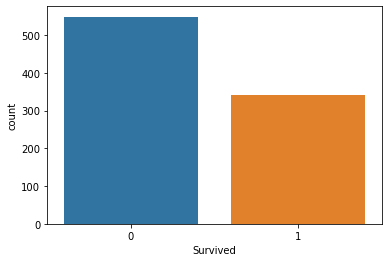

In [7]:
sns.countplot(x='Survived', data=titanic_train)

In [8]:
#Male vs Female Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

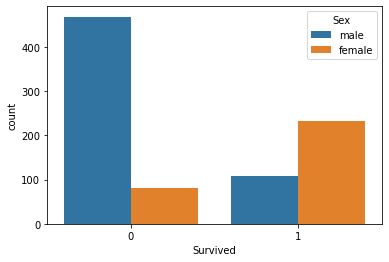

In [9]:
sns.countplot(x='Survived',data=titanic_train,hue='Sex')

In [10]:
#check for null

In [11]:
titanic_train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#check how many values are null

In [13]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Visualize null values

<AxesSubplot:>

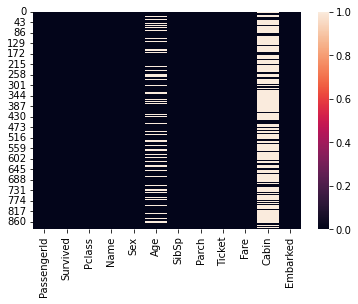

In [15]:
sns.heatmap(titanic_train.isna())

In [16]:
#find the % of null values in age column

In [17]:
(titanic_train['Age'].isna().sum()/len(titanic_train['Age']))*100

19.865319865319865

In [18]:
#find the % of null values in cabin column

In [19]:
(titanic_train['Cabin'].isna().sum()/len(titanic_train['Cabin']))*100

77.10437710437711

In [20]:
#find the distribution for the age column

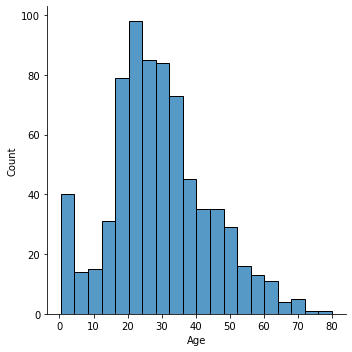

In [21]:
sns.displot(x='Age',data=titanic_train)

In [22]:
#checking null values for test data

In [23]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
#Visualize null values

<AxesSubplot:>

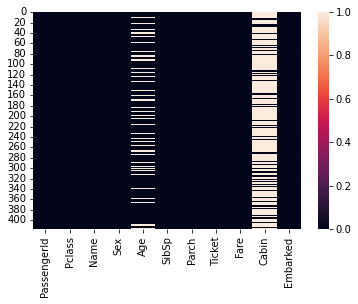

In [25]:
sns.heatmap(titanic_test.isna())

# Data Cleaning
## Fill the missing Values
We will fill the missing values for age. In order to fill missing values we use fillna() method.
for now we will fill the missing age by taking average of all age

In [26]:
#fill age

In [27]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].mean(),inplace=True)

In [28]:
titanic_test['Fare'].fillna(titanic_test['Age'].mean(),inplace=True)

In [29]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [30]:
#verify null value

In [31]:
titanic_train['Age'].isna().sum()

0

In [32]:
titanic_test['Age'].isna().sum()

0

## Alternatively we can visualize the null values using heatmap

<AxesSubplot:>

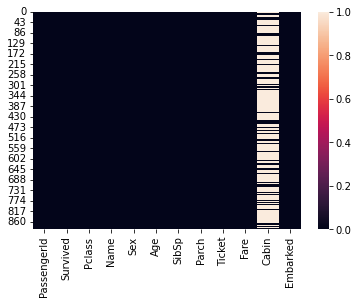

In [33]:
sns.heatmap(titanic_train.isna())

<AxesSubplot:>

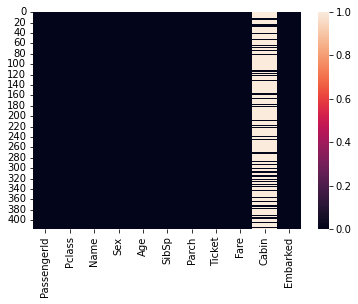

In [34]:
sns.heatmap(titanic_test.isna())

## we can 'cabin' column has a number of values of null, so we can drop cabin column

In [35]:
#drop cabin column

In [36]:
titanic_train.drop('Cabin',axis=1,inplace=True)
titanic_test.drop('Cabin',axis=1,inplace=True)

In [37]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [38]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Featuring Data for model
No we will require to convert all non-numerical columns to numeric.Please not this is required for feeding data into model.

In [39]:
#checking non-numeric column

In [40]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [41]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [42]:
titanic_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## We can see 'Name', 'Sex', 'Ticket' and 'Embarked' are non-numerical. It seems Name,Embarked and Ticket number are not useful for machine learning prediction hence we will eventually drop these. Now we should convert 'Sex' into dummies numerical.

In [43]:
#convert sex column to numerical values

In [44]:
gender = pd.get_dummies(titanic_train['Sex'],drop_first=True)
titanic_train['Gender']=gender

In [45]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [46]:
gender1 = pd.get_dummies(titanic_test['Sex'],drop_first=True)
titanic_test['Gender']=gender1

In [47]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [48]:
#drop the columns which are not required

In [49]:
titanic_train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [50]:
titanic_test.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [51]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [52]:
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


In [53]:
#Separate dependent and independent variable

In [54]:
x=titanic_train[['Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_train[['Survived']]
test=titanic_test[['Pclass','Age','SibSp','Parch','Fare','Gender']]

In [55]:
x.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
dtype: int64

In [56]:
test.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
dtype: int64

# Data Modelling
## Building Model using Logistic Regression

In [57]:
#import train test split method

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [60]:
#import Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
#Fit Logistic Regression

In [63]:
lr=LogisticRegression()

In [64]:
lr.fit(x,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [65]:
#predict

In [66]:
y_predict=lr.predict(test)

In [67]:
y_predict.shape

(418,)

In [68]:
submission = pd.DataFrame({
    "PassengerId":titanic_test["PassengerId"],
    "Survived":y_predict
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [69]:
submission.to_csv("submission.csv",index=False)